### Traffic Accidents in Los Angeles County

Exploration of data from Statewide Integrated Traffic Records data (SWITRS), showing traffic accidents broken down by injury or fatality, and by collision type (car-to-car, car-to-pedestrian, car-to-bicycle). 

In [1]:
import pandas as pd

Next, we import the data from SWITRS

In [2]:
# load the year over year data file
df = pd.read_csv('data/LAFatalities.csv')

### Preliminary Inspection
A quick look at the size of data

In [3]:
df.shape

(10, 3)

In [4]:
df.head()

,Year,Fatalities_LA County,Injuries_LA County
0,2010,530,50153
1,2011,513,50476
2,2012,585,50622
3,2013,585,50917
4,2014,606,51988


<AxesSubplot: title={'center': 'Traffic Fatalities in LA County 2010 to 2019'}, xlabel='Year'>

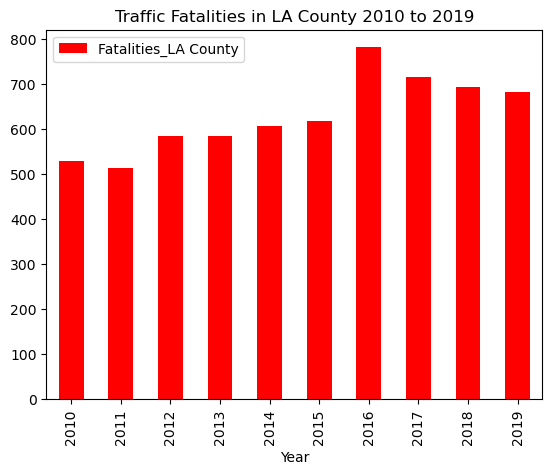

In [5]:
# make a bar graph
df.head(10).plot.bar(x='Year',
            y='Fatalities_LA County',
            title='Traffic Fatalities in LA County 2010 to 2019',
            color='red')

<AxesSubplot: title={'center': 'Traffic Injuries in LA County 2010 to 2019'}, xlabel='Year'>

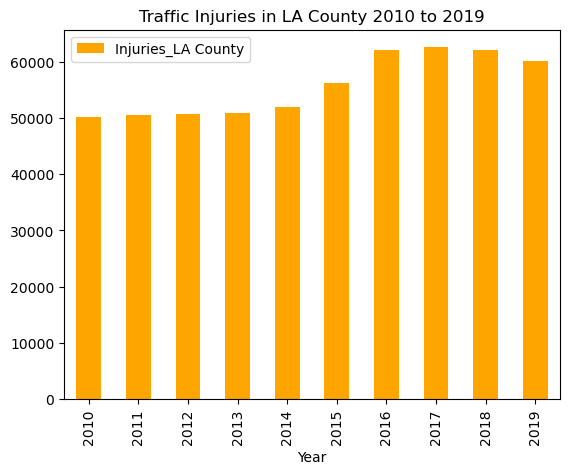

In [9]:
# make a bar graph
df.head(10).plot.bar(x='Year',
            y='Injuries_LA County',
            title='Traffic Injuries in LA County 2010 to 2019',
            color='orange')

In [7]:
# Define a helper function for making a table of colors, then we will use it on some common color categories.

import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig